# GoodReads Data Analysis

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date

import warnings
warnings.filterwarnings("ignore") #comment this out if there are unexpected errors below

In [226]:
raw = pd.read_csv('ReadingHistory.csv')

## Cleaning & Tidying

Checklist
 - Drop duplicates
 - Drop unread books
 - Convert "My Rating" column into integer on a scale of 1 to 5
 - Convert all Date strings to DateTime values
 
Note on Dates in Pandas (from StackOverflow):

Since pandas represents timestamps in nanosecond resolution, the timespan that can be represented using a 64-bit integer is limited to approximately 584 years. The earliest time stamp that can be represented as of this writing is 1677. So, writings by Plato or Shakespear, to name a few, will be eliminated from the dataset. 

In [227]:
duplicates = raw.groupby(raw.Title.tolist(),as_index=False).size().sort_values('size', ascending=False)
duplicates
# count = duplicates[duplicates['size'] >= 2].count()
# count.count()
# print("There are {} duplicate rows".format(duplicates[duplicates['size'] >= 2].count()))
# duplicates

,index,size
0,10:04,2
662,What We Talk About When We Talk About Love,2
661,What Belongs to You,2
443,Stories of Your Life and Others,2
26,After the Fall: Being American in the World We...,2
...,...,...
235,"High Tide in Hawaii (Magic Tree House, #28)",1
236,Hillbilly Elegy: A Memoir of a Family and Cult...,1
237,"Holes (Holes, #1)",1
238,Hollow City (Miss Peregrine's Peculiar Childre...,1


In [228]:
raw = raw.drop_duplicates(subset=['Title'], keep="first")
all_books = raw['Title'].count()
books_read = raw.dropna(subset=['My Rating'])
books_read_count = books_read['Title'].count()
books_unread = raw[raw['Read Count'] == 0]
books_unread_count = books_unread['Title'].count()

In [229]:
#Translate "My Rating" column into integers
def label_rating_integer (row):
   if row['My Rating'] == 'did not like it' :
      return 1
   if row['My Rating'] == 'it was ok' :
      return 2
   if row['My Rating'] == 'liked it' :
      return 3
   if row['My Rating']  == 'really liked it' :
      return 4
   if row['My Rating'] == 'it was amazing' :
      return 5
    
books_read['My Rating (int)'] = books_read.apply(lambda row: label_rating_integer(row), axis=1)

In [230]:
def guess_date(string):
    for format_style in ['%b %d, %Y', '%b %d %Y', '%b %Y', '%Y']:
        #Cells with only a year will autofill to the the first day of the first month of that year
        #Cells with only a month and year will autofill to the first day of that month
        #Cells with "Unknown" will autofill to "None"
        try:
            return datetime.datetime.strptime(string, format_style).date()
        except ValueError:
            continue
#    raise ValueError(string)

In [231]:
books_read['Publish Date'] = books_read['Publish Date'].apply(lambda x: guess_date(x))
books_read['Publish Date Edition'] = books_read['Publish Date Edition'].apply(lambda x: guess_date(x))
books_read['Date Started'] = books_read['Date Started'].apply(lambda x: guess_date(x))
books_read['Date Read'] = books_read['Date Read'].apply(lambda x: guess_date(x))
books_read['Date Added'] = books_read['Date Added'].apply(lambda x: guess_date(x))

In [232]:
books_read['Publish Date'] = pd.to_datetime(books_read['Publish Date'], errors='coerce')
books_read['Publish Date Edition'] = pd.to_datetime(books_read['Publish Date Edition'], errors='coerce')
books_read['Date Started'] = pd.to_datetime(books_read['Date Started'], errors='coerce')
books_read['Date Read'] = pd.to_datetime(books_read['Date Read'], errors='coerce')
books_read['Date Added'] = pd.to_datetime(books_read['Date Added'], errors='coerce')

In [233]:
books_read['Reading Time (Days)'] = books_read['Date Read'] - books_read['Date Started']
books_read['Reading Time (Days)'] = books_read['Reading Time (Days)'].dt.days

In [234]:
print("There are {} books in your GoodReads account".format(all_books))
print("There are {} read books".format(books_read_count))
print("There are {} unread books".format(books_unread_count))

print('Most recent addition:')
print('')
# print(books_read['Date Read'].max())
print(books_read.loc[books_read['Date Read'].idxmax()])

There are 680 books in your GoodReads account
There are 566 read books
There are 82 unread books
Most recent addition:

Title                   Stories of Your Life and Others
Author                                      Chiang, Ted
ISBN                                         1101972122
IBSN13                                  9781101972120.0
Number of Pages                                   286.0
Average Rating                                     4.22
Number of Ratings                                 76097
Publish Date                        2002-07-01 00:00:00
Publish Date Edition                2016-06-14 00:00:00
My Rating                               really liked it
Shelves                                    1 of 5 stars
Read Count                                            1
Date Started                        2021-07-12 00:00:00
Date Read                           2021-07-15 00:00:00
Date Added                          2021-07-12 00:00:00
My Rating (int)                         

In [235]:
books_read.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 3 to 712
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Title                 566 non-null    object        
 1   Author                566 non-null    object        
 2   ISBN                  514 non-null    object        
 3   IBSN13                517 non-null    float64       
 4   Number of Pages       558 non-null    float64       
 5   Average Rating        566 non-null    float64       
 6   Number of Ratings     566 non-null    int64         
 7   Publish Date          547 non-null    datetime64[ns]
 8   Publish Date Edition  562 non-null    datetime64[ns]
 9   My Rating             566 non-null    object        
 10  Shelves               566 non-null    object        
 11  Read Count            566 non-null    int64         
 12  Date Started          82 non-null     datetime64[ns]
 13  Date Read           

In [236]:
books_read.isnull().sum()

Title                     0
Author                    0
ISBN                     52
IBSN13                   49
Number of Pages           8
Average Rating            0
Number of Ratings         0
Publish Date             19
Publish Date Edition      4
My Rating                 0
Shelves                   0
Read Count                0
Date Started            484
Date Read               126
Date Added                0
My Rating (int)           0
Reading Time (Days)     484
dtype: int64

## Page Analysis

In [237]:
pages = raw['Number of Pages']
no_pages = pages.isnull().sum()
pages = pages.dropna()
books_with_page_counts = pages.count()

print('Books without page counts listed on Goodreads: {}'.format(no_pages))
print('Books that can be analyzed: {}'.format(books_with_page_counts))

Books without page counts listed on Goodreads: 9
Books that can be analyzed: 671


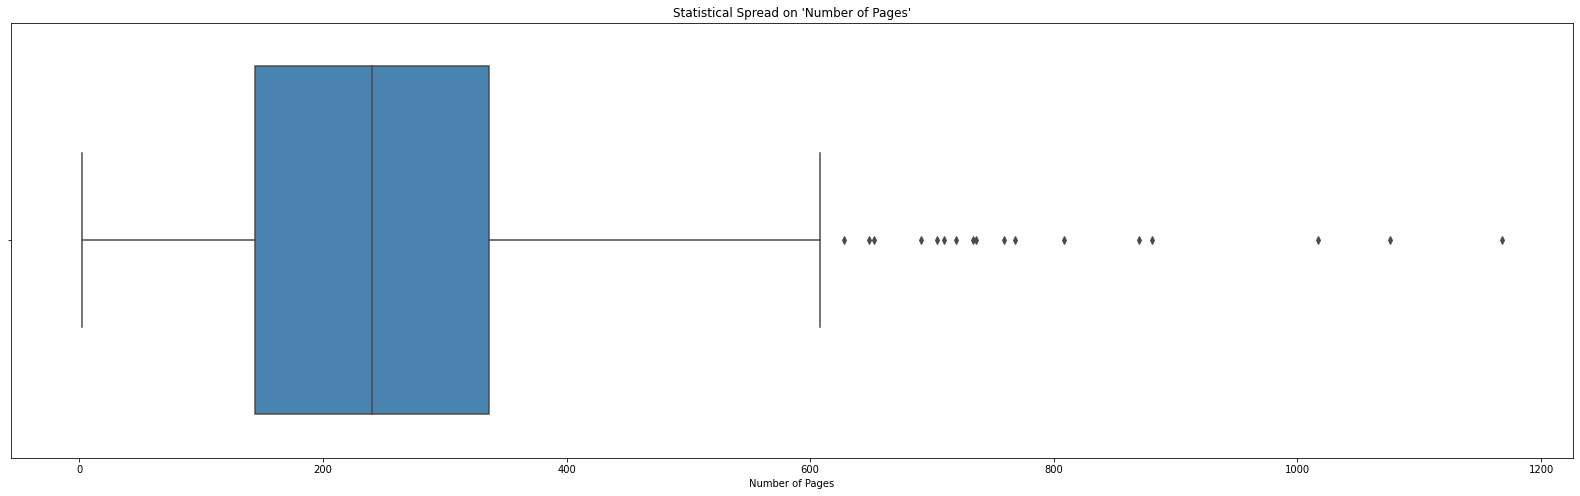

Mean: 262.0
Median: 240.0
Max: 1168.0; Title: ['Guardians of the Galaxy by Brian Michael Bendis Omnibus, Vol. 1']
Min: 2.0; Title: ['A Perfect Time for Pandas (Magic Tree House, #48)']


In [238]:
fig, ax = plt.subplots(figsize=(28,8))
sns.boxplot(x=pages, palette='Blues_d').set_title("Statistical Spread on 'Number of Pages'")
plt.show()

pages_mean = round(raw['Number of Pages'].mean(), 0)
pages_median = round(raw['Number of Pages'].median(), 0)
pages_max = round(raw['Number of Pages'].max(), 0)
book_max = raw.loc[raw['Number of Pages'] == pages_max]
pages_min = round(raw['Number of Pages'].min(), 0)
book_min = raw.loc[raw['Number of Pages'] == pages_min]

print('Mean: {}'.format(pages_mean))
print('Median: {}'.format(pages_median))
print('Max: {}; Title: {}'.format(pages_max, book_max['Title'].values))
print('Min: {}; Title: {}'.format(pages_min, book_min['Title'].values))

### Authors

Checklist:
 - Most Read Authors
 - Most Read Authors by Books Read
 - Most Read Authors by Pages Read
 - Most Read Authors factoring in Read Count

In [239]:
author_read_counts = books_read['Author'].value_counts().rename_axis('Author').reset_index(name='Counts')
author_read_counts = author_read_counts[author_read_counts['Counts'] > 1]
print("The number of authors you have read twice or more: {}".format(author_read_counts['Author'].count()))

The number of authors you have read twice or more: 77


In [240]:
authors = books_read['Author'].value_counts()
authors_dataframe = pd.DataFrame({'Author': authors.index, 'Books Read': authors.values})
authors_top20 = authors_dataframe[:20]
print('Top 20 Most Read Authors')
print('')
authors_top20

Top 20 Most Read Authors



,Author,Books Read
0,"Bendis, Brian Michael",52
1,"Osborne, Mary Pope",50
2,"King, Tom",14
3,"Snyder, Scott",12
4,"Johns, Geoff",10
5,"Horowitz, Anthony",10
6,"Soule, Charles",9
7,"Riordan, Rick",8
8,"Spencer, Nick",8
9,"Rowling, J.K.",8


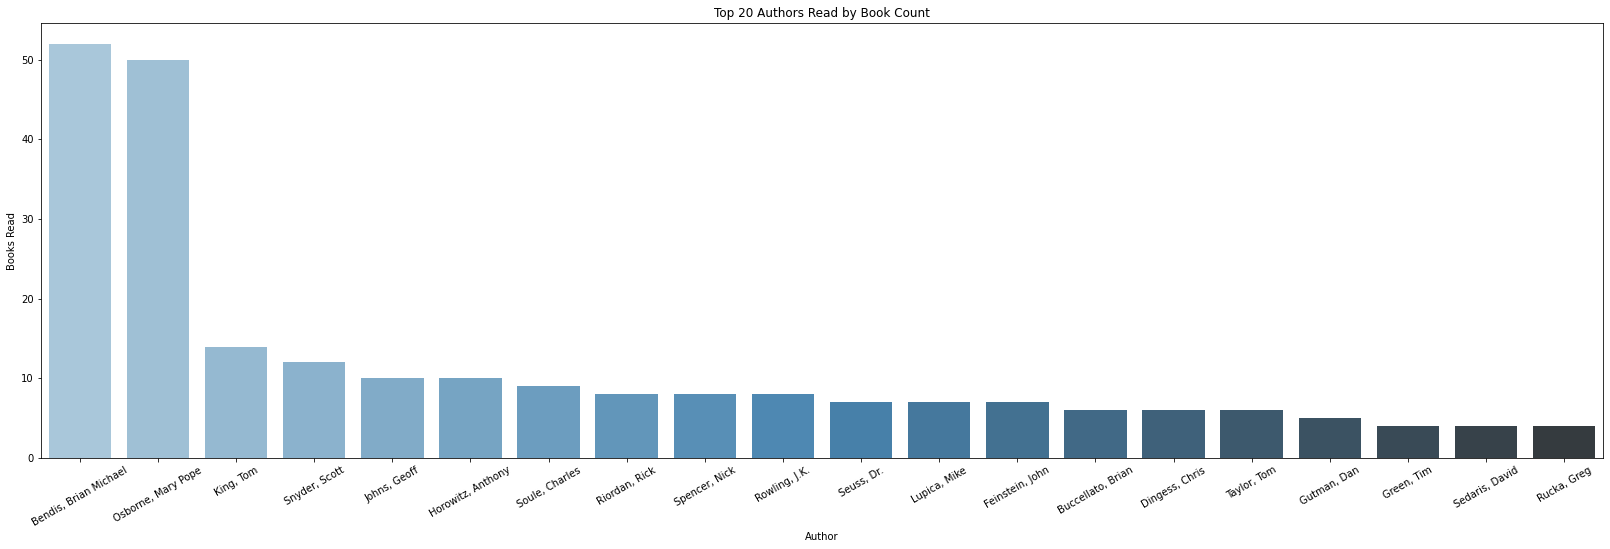

In [241]:
fig, ax = plt.subplots(figsize=(28,8))
plot = sns.barplot(x=authors_top20['Author'], y=authors_top20['Books Read'], palette='Blues_d')
ax.set_title('Top 20 Authors Read by Book Count')
plt.setp(plot.get_xticklabels(), rotation=30)
plt.show()

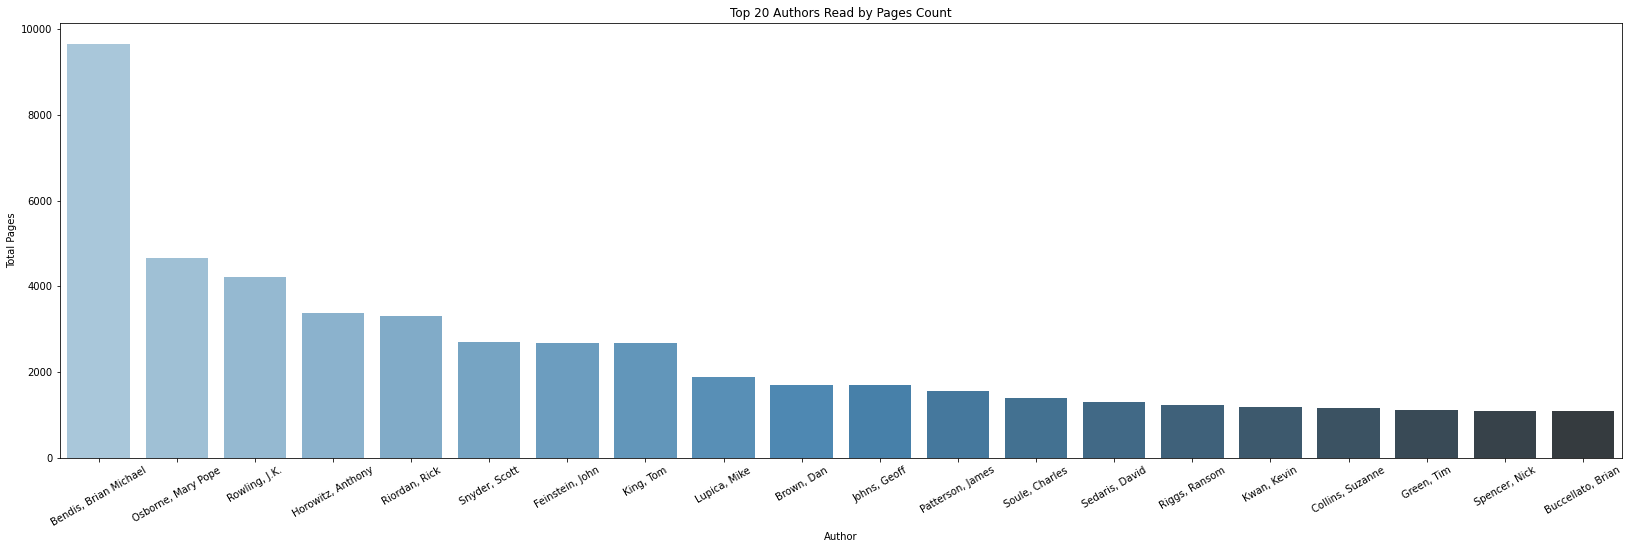

In [242]:
author_groupings = books_read.groupby('Author')
authors_pages = author_groupings['Number of Pages'].sum()
authors_pages_df = pd.DataFrame({'Author': authors_pages.index, 'Total Pages': authors_pages.values})
authors_pages_df_sorted = authors_pages_df.sort_values(by=['Total Pages'], ascending=False)
authors_pages_df_sorted_top20 = authors_pages_df_sorted[:20]

fig, ax = plt.subplots(figsize=(28,8))
plot = sns.barplot(x=authors_pages_df_sorted_top20['Author'], y=authors_pages_df_sorted_top20['Total Pages'], palette='Blues_d')
ax.set_title('Top 20 Authors Read by Pages Count')
plt.setp(plot.get_xticklabels(), rotation=30)
plt.show()

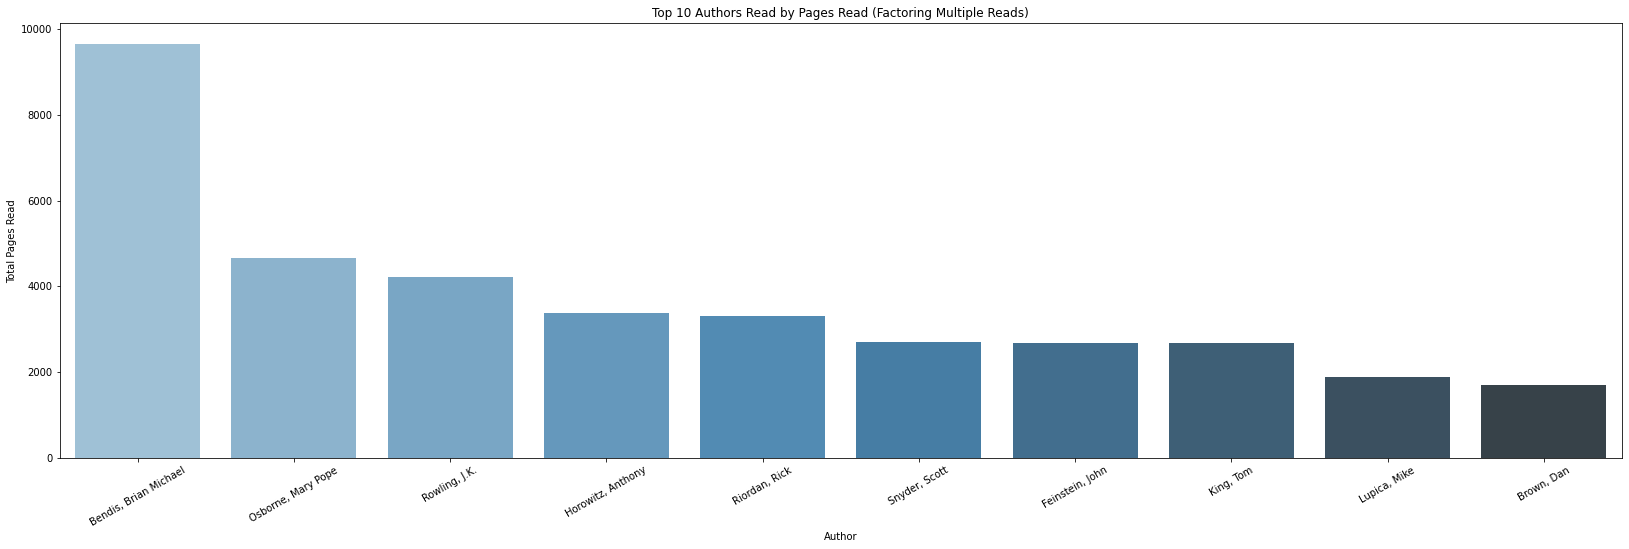

In [243]:
authors_df = books_read[['Title', 'Author', 'Number of Pages', 'Read Count']]
authors_df['Total Pages Read'] = authors_df['Number of Pages'] * authors_df['Read Count']
author_groupings = authors_df.groupby('Author')
author_tps = author_groupings['Total Pages Read'].sum()
author_tps_df = pd.DataFrame({'Author': author_tps.index, 'Total Pages Read': author_tps.values})
author_tps_df_sorted = author_tps_df.sort_values(by='Total Pages Read', ascending=False)
author_tps_df_sorted_top10 = author_tps_df_sorted[:10]

fig, ax = plt.subplots(figsize=(28,8))
plot = sns.barplot(x=author_tps_df_sorted_top10['Author'], y=author_tps_df_sorted_top10['Total Pages Read'], palette='Blues_d')
ax.set_title('Top 10 Authors Read by Pages Read (Factoring Multiple Reads)')
plt.setp(plot.get_xticklabels(), rotation=30)
plt.show()

## Ratings Analysis

Checklist
 - Statistical Spread on 'Numbers of Pages'
 - Statistical Spread on 'Numbers of Pages' adjusted for outliers

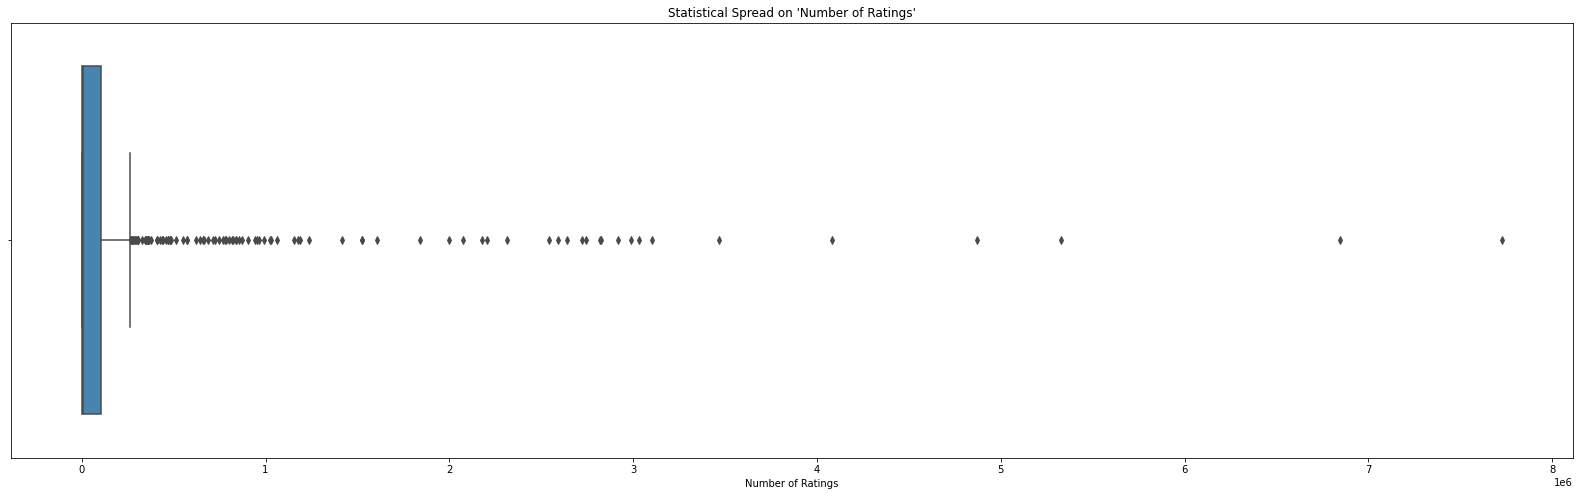

Mean: 237669.0
Median: 7670.0
Max: 7726796; Title: ["Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"]
Min: 1; Title: ['American Made']


In [244]:
fig, ax = plt.subplots(figsize=(28,8))
sns.boxplot(x=books_read['Number of Ratings'], palette='Blues_d').set_title("Statistical Spread on 'Number of Ratings'")
plt.show()

ratings_mean = round(books_read['Number of Ratings'].mean(), 0)
ratings_median = round(books_read['Number of Ratings'].median(), 0)
ratings_max = round(books_read['Number of Ratings'].max(), 0)
book_max = books_read.loc[books_read['Number of Ratings'] == ratings_max]
ratings_min = round(books_read['Number of Ratings'].min(), 0)
book_min = books_read.loc[books_read['Number of Ratings'] == ratings_min]

print('Mean: {}'.format(ratings_mean))
print('Median: {}'.format(ratings_median))
print('Max: {}; Title: {}'.format(ratings_max, book_max['Title'].values))
print('Min: {}; Title: {}'.format(ratings_min, book_min['Title'].values))

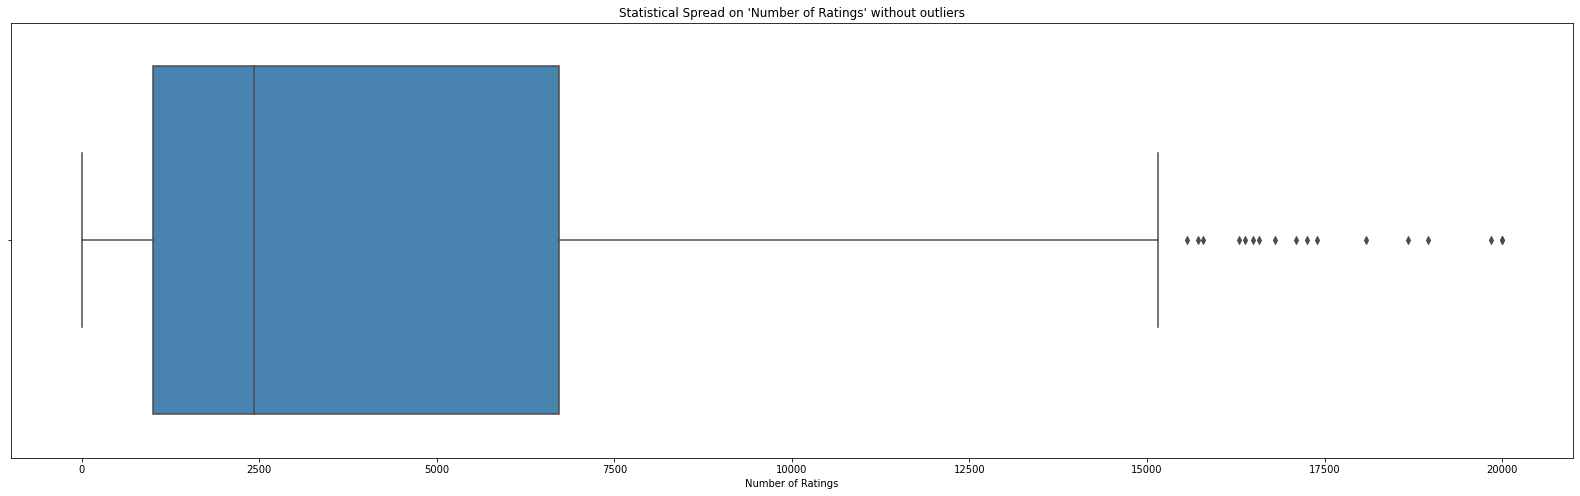

Mean: 4456.0
Median: 2420.0
Max: 19999; Title: ["A Children's Bible"]
Min: 1; Title: ['American Made']


In [245]:
ratings_no_outliers = books_read[books_read['Number of Ratings'] <= 20000]

fig, ax = plt.subplots(figsize=(28,8))
sns.boxplot(x=ratings_no_outliers['Number of Ratings'], palette='Blues_d').set_title("Statistical Spread on 'Number of Ratings' without outliers")
plt.show()

ratings_mean = round(ratings_no_outliers['Number of Ratings'].mean(), 0)
ratings_median = round(ratings_no_outliers['Number of Ratings'].median(), 0)
ratings_max = round(ratings_no_outliers['Number of Ratings'].max(), 0)
book_max = ratings_no_outliers.loc[ratings_no_outliers['Number of Ratings'] == ratings_max]
ratings_min = round(ratings_no_outliers['Number of Ratings'].min(), 0)
book_min = ratings_no_outliers.loc[ratings_no_outliers['Number of Ratings'] == ratings_min]

print('Mean: {}'.format(ratings_mean))
print('Median: {}'.format(ratings_median))
print('Max: {}; Title: {}'.format(ratings_max, book_max['Title'].values))
print('Min: {}; Title: {}'.format(ratings_min, book_min['Title'].values))

Text(0.5, 1.0, 'Most Rated Books on GoodReads in your Reading History')

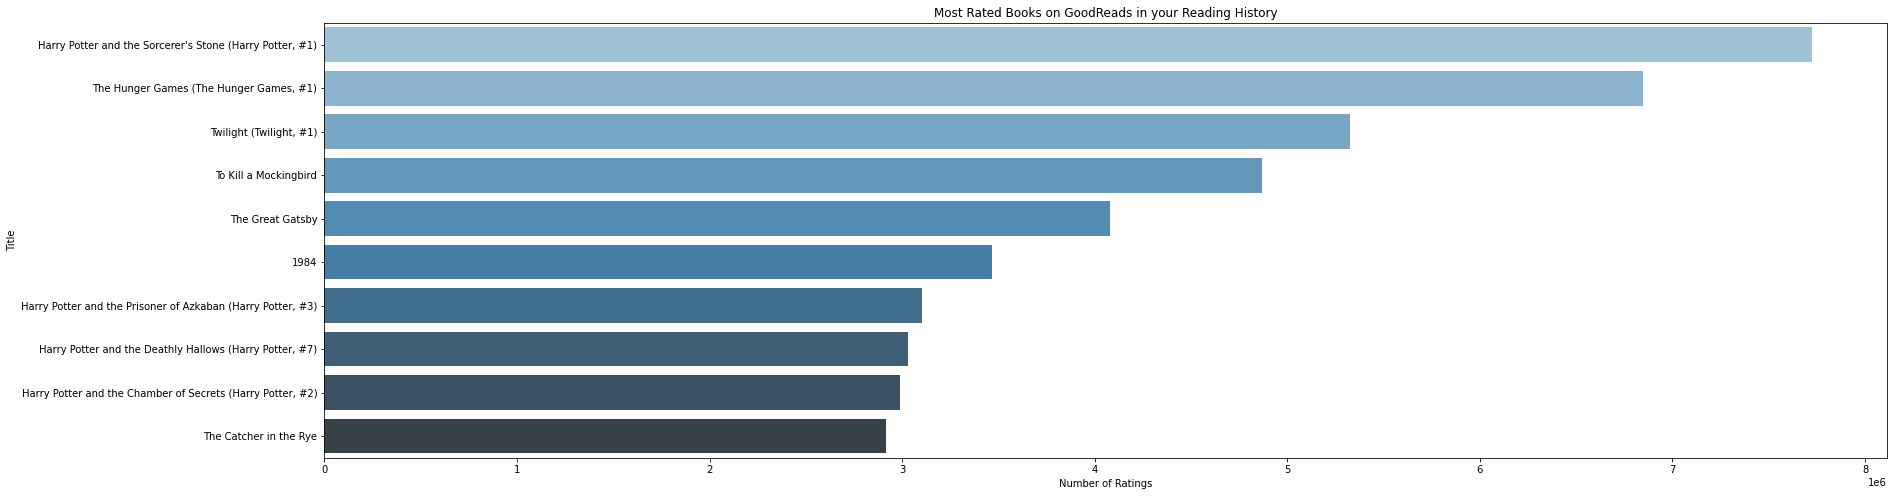

In [246]:
most_rated = books_read.sort_values('Number of Ratings', ascending = False).head(10).set_index('Title')
plt.figure(figsize=(28,8))
sns.barplot(most_rated['Number of Ratings'], most_rated.index, palette='Blues_d').set_title("Most Rated Books on GoodReads in your Reading History")

## Dates & Reading Time

Checklist
 - Longest Reads by Days Spent Reading
 - Books with Most Pages Read per Day
 - Books with Least Pages Read per Day

In [247]:
reading_time_df = books_read[books_read['Reading Time (Days)'].notnull()]

Text(0.5, 1.0, 'Longest Reads by Day Spent Reading')

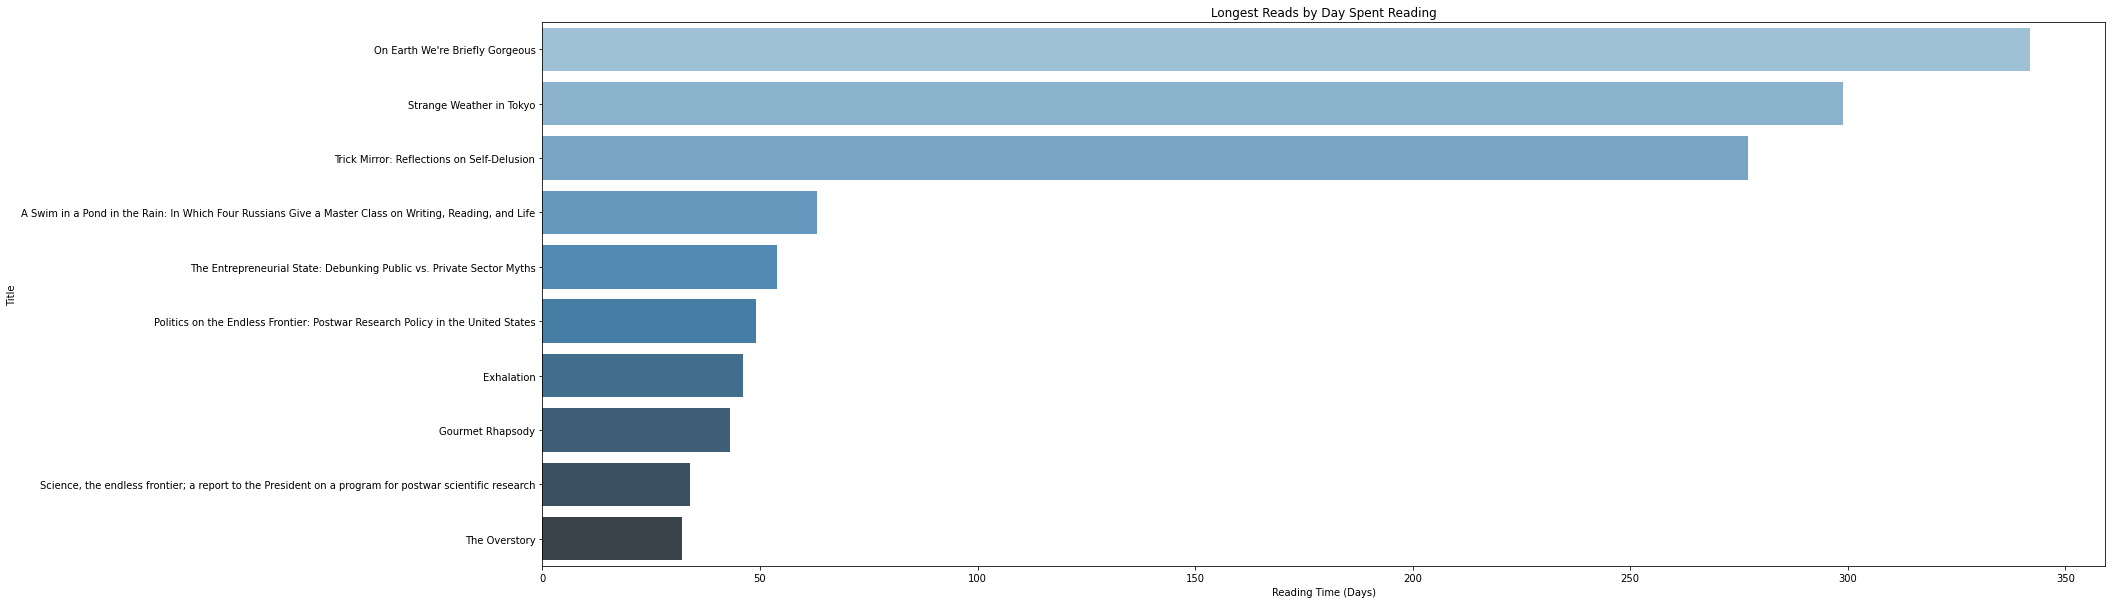

In [248]:
longest_reads = reading_time_df.sort_values(by='Reading Time (Days)', ascending=False).head(10).set_index('Title')
plt.figure(figsize=(28,10))
sns.barplot(longest_reads['Reading Time (Days)'], longest_reads.index, palette='Blues_d').set_title("Longest Reads by Day Spent Reading")

In [249]:
reading_time_df['Pages/Day'] = round(reading_time_df['Number of Pages'] / reading_time_df['Reading Time (Days)'], 2)
reading_time_df['Pages/Day'].replace([np.inf, -np.inf], np.nan, inplace=True)
reading_time_df['Pages/Day'].fillna(reading_time_df['Number of Pages'], inplace=True)

Text(0.5, 1.0, 'Books with Most Pages Read per Day')

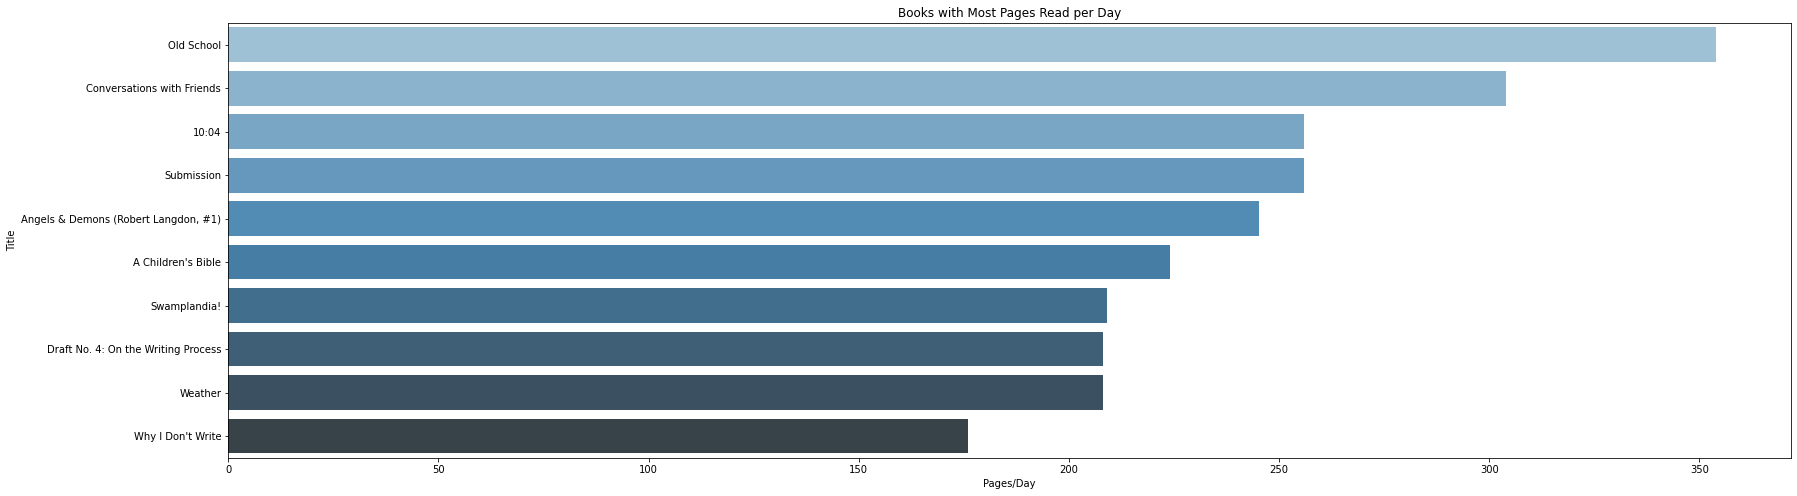

In [250]:
most_pages_read_daily = reading_time_df.sort_values(by='Pages/Day', ascending=False).head(10).set_index('Title')
fig, ax = plt.subplots(figsize=(28,8))
sns.barplot(most_pages_read_daily['Pages/Day'], most_pages_read_daily.index, palette='Blues_d').set_title("Books with Most Pages Read per Day")

Text(0.5, 1.0, 'Books with Least Pages Read per Day')

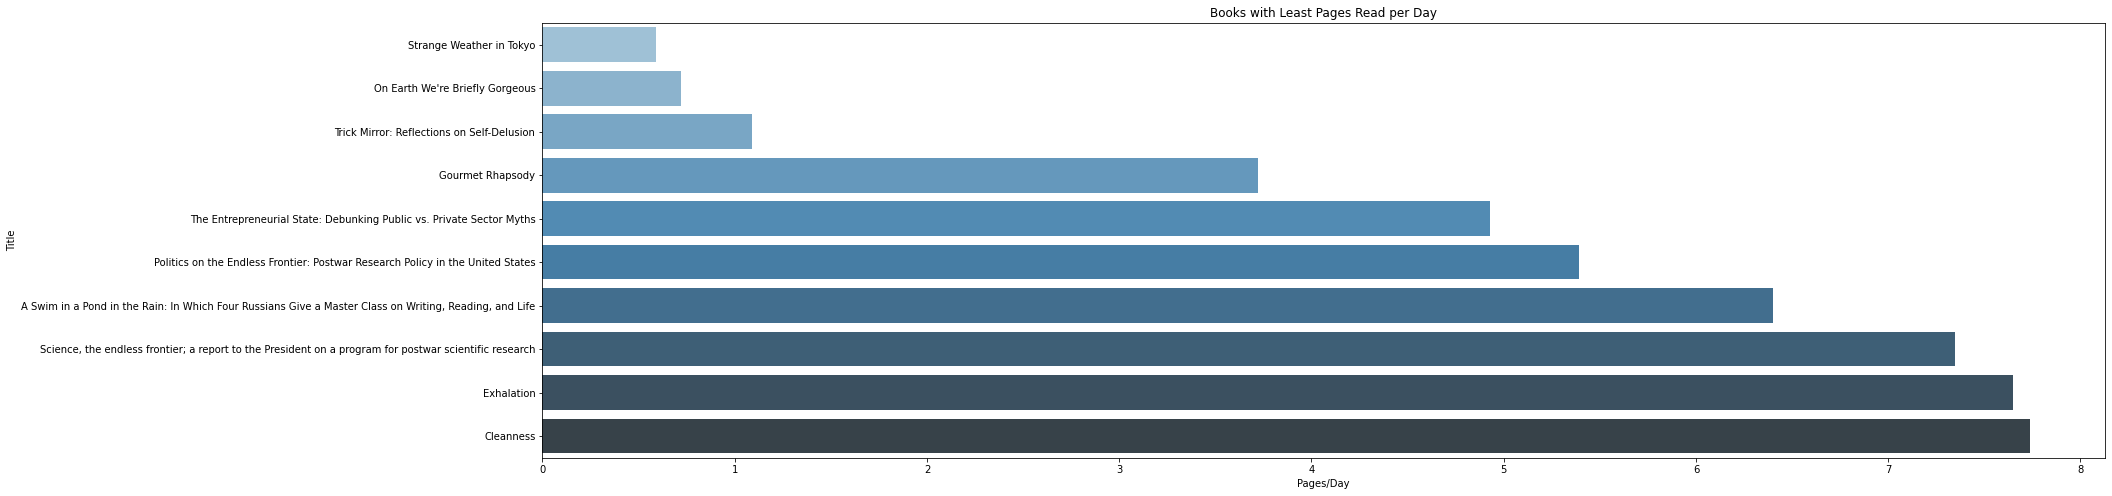

In [251]:
least_pages_read_daily = reading_time_df.sort_values(by='Pages/Day', ascending=True).head(10).set_index('Title')
fig, ax = plt.subplots(figsize=(28,8))
sns.barplot(least_pages_read_daily['Pages/Day'], least_pages_read_daily.index, palette='Blues_d').set_title("Books with Least Pages Read per Day")

## Year in Reading

This section examines the last 365 days of your reading history.

Checklist:

- Book Count
- Ratings Visualization
- 5 Star Read Display
- 1 Star Read Display
- Pages Read in Recent Year versus entire library

In [290]:
one_year_ago = datetime.datetime.now() - datetime.timedelta(days=1*365)
recent_year = books_read[books_read['Date Read'] >= one_year_ago]
print("Books Read in last 365 days: {}".format(recent_year['Title'].count()))

Books Read in last 365 days: 48


You rated 10 books at 5 Stars
You rated 21 books at 4 Stars
You rated 13 books at 3 Stars
You rated 4 books at 2 Stars
You rated 0 books at 1 Stars


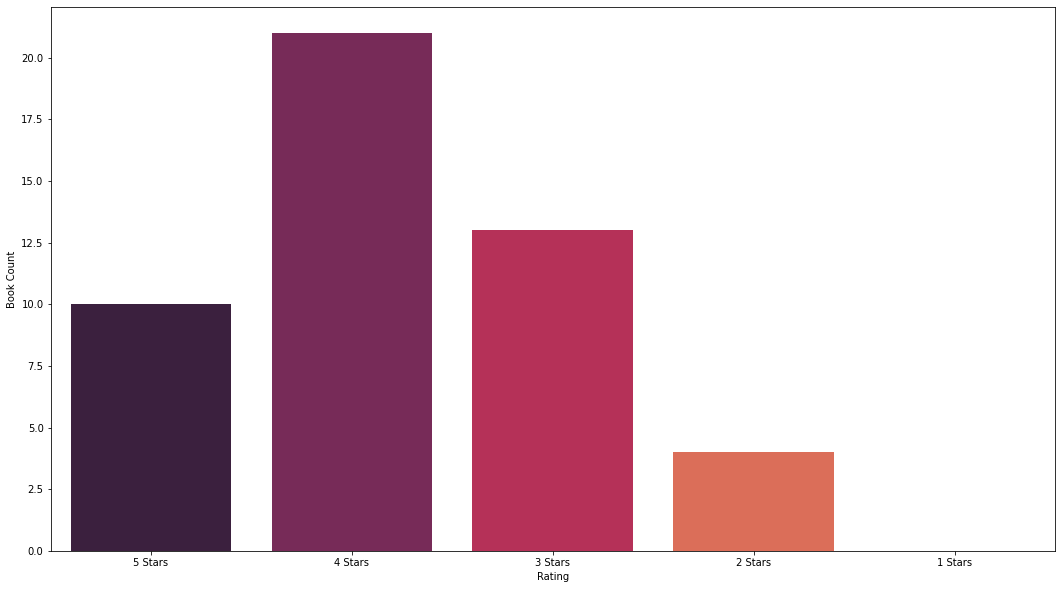

In [291]:
five_star_reads = recent_year[recent_year['My Rating (int)'] == 5]
four_star_reads = recent_year[recent_year['My Rating (int)'] == 4]
three_star_reads = recent_year[recent_year['My Rating (int)'] == 3]
two_star_reads = recent_year[recent_year['My Rating (int)'] == 2]
one_star_reads = recent_year[recent_year['My Rating (int)'] == 1]

fives = int(five_star_reads['Title'].count())
fours = int(four_star_reads['Title'].count())
threes = int(three_star_reads['Title'].count())
twos = int(two_star_reads['Title'].count())
ones = int(one_star_reads['Title'].count())

print("You rated {} books at 5 Stars".format(fives))
print("You rated {} books at 4 Stars".format(fours))
print("You rated {} books at 3 Stars".format(threes))
print("You rated {} books at 2 Stars".format(twos))
print("You rated {} books at 1 Stars".format(ones))

recent_year_ratings = pd.DataFrame({
    'Rating': ['5 Stars', '4 Stars', '3 Stars', '2 Stars', '1 Stars'],
    'Book Count': [fives, fours, threes, twos, ones]
})

bar, ax = plt.subplots(figsize=[18,10])
ax = sns.barplot(x=recent_year_ratings.Rating, y=recent_year_ratings['Book Count'], palette='rocket')

In [293]:
five_star_reads

,Title,Author,ISBN,IBSN13,Number of Pages,Average Rating,Number of Ratings,Publish Date,Publish Date Edition,My Rating,Shelves,Read Count,Date Started,Date Read,Date Added,My Rating (int),Reading Time (Days)
9,What Belongs to You,"Greenwell, Garth",0374288224,9.780374e+12,195.0,3.77,10907,2016-01-19,2016-01-19,it was amazing,1 of 5 stars,1,2021-07-05,2021-07-07,2021-06-24,5,2.0
17,Too Loud a Solitude,"Hrabal, Bohumil",0349102627,9.780349e+12,98.0,4.04,17092,1976-01-01,2007-08-01,it was amazing,1 of 5 stars,1,2021-05-28,2021-05-29,2021-05-28,5,1.0
19,Old School,"Wolff, Tobias",NaN,NaN,354.0,3.83,11593,2003-01-01,2004-08-31,it was amazing,1 of 5 stars,1,2021-05-29,2021-05-30,2021-05-28,5,1.0
61,Interpreter of Maladies,"Lahiri, Jhumpa",0618101365,9.780618e+12,198.0,4.16,167672,1999-04-20,2000-05-22,it was amazing,1 of 5 stars,1,2021-05-08,2021-05-12,2021-04-19,5,4.0
64,The Entrepreneurial State: Debunking Public vs...,"Mazzucato, Mariana",0857282514,9.780857e+12,266.0,3.97,1974,2011-01-01,2013-06-10,it was amazing,1 of 5 stars,1,2021-01-21,2021-03-16,2021-03-24,5,54.0
86,A Children's Bible,"Millet, Lydia",1324005033,9.781324e+12,224.0,3.75,19999,2020-05-12,2020-05-12,it was amazing,1 of 5 stars,1,2020-12-07,2020-12-08,2020-12-07,5,1.0
95,The Only Story,"Barnes, Julian",1473554799,9.781474e+12,272.0,3.61,18670,2018-02-01,2018-02-01,it was amazing,1 of 5 stars,1,2020-11-05,2020-11-12,2020-11-05,5,7.0
98,The Sense of an Ending,"Barnes, Julian",0224094157,9.780224e+12,150.0,3.73,159683,2011-08-04,2011-08-04,it was amazing,1 of 5 stars,1,2020-10-24,2020-10-25,2020-10-24,5,1.0
216,The Kite Runner,"Hosseini, Khaled",NaN,NaN,371.0,4.31,2592756,2003-05-29,2004-05-01,it was amazing,1 of 5 stars,1,2020-10-30,2020-11-02,2019-06-12,5,3.0
284,The Underground Railroad,"Whitehead, Colson",0385542364,9.780386e+12,306.0,4.04,328239,2016-08-02,2016-08-02,it was amazing,1 of 5 stars,1,2020-08-25,2020-09-01,2018-07-23,5,7.0


In [294]:
one_star_reads

,Title,Author,ISBN,IBSN13,Number of Pages,Average Rating,Number of Ratings,Publish Date,Publish Date Edition,My Rating,Shelves,Read Count,Date Started,Date Read,Date Added,My Rating (int),Reading Time (Days)


In [256]:
average_pages = recent_year['Number of Pages'].mean()
print(average_pages)
median_pages = recent_year['Number of Pages'].median()
print(median_pages)

259.40425531914894
266.0


# Other Possible Directions

Author Read Counts
- Box Plot distributions for the pages of every individual book of the top 10 most read authors

Author Likability
- Average ratings and Number of Ratings
- Deviation from average rating based on my ratings
- Scatterplot of Avg. Rating v Number of Ratings